In [1]:
import pandas as pd
import numpy as np
import glob
import dropbox as db
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns
from soccer_pitch import full_pitch, half_pitch

In [ ]:
def box_map():
    # Create figure
    fig=plt.figure()
    fig.set_size_inches(16, 9)
    ax = fig.add_subplot(1,1,1)

    # Set color Scheme
    line_color = '#FAFAFA'
    fig.set_facecolor("#66BB6A")

    # Pitch Outline & Centre Line
    #plt.plot([0,0],[0,40], color="black")
    #plt.plot([0,80],[40,40], color="black")
    #plt.plot([-25,25],[25,25], color='white')
    plt.plot([-25,25],[0,0], color=line_color)

    # Penalty Area
    plt.plot([-22,22],[18,18], color=line_color)
    plt.plot([-22,-22],[0,18], color=line_color)
    plt.plot([22,22],[0,18], color=line_color)

    # 6-yard Box
    plt.plot([-10,10],[6,6], color=line_color)
    plt.plot([-10,-10],[0,6], color=line_color)
    plt.plot([10,10],[0,6], color=line_color)

    # Goal
    plt.plot([-4,4],[-2,-2], color=line_color)
    plt.plot([-4,-4],[0,-2], color=line_color)
    plt.plot([4,4],[0,-2], color=line_color)

    # Penalty Spot
    PenSpot = plt.Circle((0,12),0.5,color=line_color)
    ax.add_patch(PenSpot)

    # Penalty Arc
    penalty_arc = Arc((0,8.3),height=30,width=30,angle=90,theta1=310,theta2=50,color=line_color)
    ax.add_patch(penalty_arc)

    #Tidy Axes
    plt.axis('off')

In [ ]:
def full_pitch(background, line, provider):
     # Create figure
    fig=plt.figure()
    fig.set_size_inches(16, 9)
    ax = fig.add_subplot(1,1,1)

     # Set color Scheme
    line_color = line
    fig.set_facecolor(background)

    # Set dimensions Instat
    if provider == "Instat":
        length = 105
        width = 68
        pen_area_x = 16.5
        pen_area_y = 13.85
        pen_area_y2 = 54.15
        six_yard_x = 5.5
        six_yard_y = 24.85
        six_yard_y2 = 43.15
        penalty_spot = [11,34]
    else:
        length = 120
        width = 80
        pen_area_x = 18
        pen_area_y = 18
        pen_area_y2 = 62
        six_yard_x = 6
        six_yard_y = 30
        six_yard_y2 = 50
        penalty_spot = [12,40]


    # Pitch Outline & Centre Line
    plt.plot([0,0],[0,width], color=line_color)
    plt.plot([0,length],[width,width], color=line_color)
    plt.plot([length,length],[width,0], color=line_color)
    plt.plot([length,0],[0,0], color=line_color)
    plt.plot([length / 2, length / 2], [0, width], color=line_color)

    # Left Penalty Area
    plt.plot([0,pen_area_x], [pen_area_y, pen_area_y], color=line_color)
    plt.plot([0,pen_area_x], [pen_area_y2,pen_area_y2], color=line_color)
    plt.plot([pen_area_x,pen_area_x], [pen_area_y,pen_area_y2], color=line_color)

    # Left 6-yard Box
    plt.plot([0,six_yard_x], [six_yard_y, six_yard_y], color=line_color)
    plt.plot([0,six_yard_x], [six_yard_y2,six_yard_y2], color=line_color)
    plt.plot([six_yard_x,six_yard_x], [six_yard_y,six_yard_y2], color=line_color)

    # Left Penalty Spot
    PenSpot = plt.Circle(penalty_spot,0.5, color=line_color)
    ax.add_patch(PenSpot)

    # Left Penalty Arc
    penalty_arc = Arc(penalty_spot,height=18.3,width=18.3,angle=360,theta1=307,theta2=53, color=line_color)
    ax.add_patch(penalty_arc)

     # Right Penalty Area
    plt.plot([length,length - pen_area_x], [width - pen_area_y, width - pen_area_y], color=line_color)
    plt.plot([length, length - pen_area_x], [width - pen_area_y2, width - pen_area_y2], color=line_color)
    plt.plot([length - pen_area_x, length - pen_area_x], [width - pen_area_y, width - pen_area_y2], color=line_color)

    # Right 6-yard Box
    plt.plot([length, length - six_yard_x], [width - six_yard_y, width - six_yard_y], color=line_color)
    plt.plot([length, length - six_yard_x], [width - six_yard_y2, width - six_yard_y2], color=line_color)
    plt.plot([length - six_yard_x, length - six_yard_x], [width - six_yard_y, width - six_yard_y2], color=line_color)

    # Right Penalty Spot
    PenSpot = plt.Circle((length-penalty_spot[0], penalty_spot[1]),0.5, color=line_color)
    ax.add_patch(PenSpot)

    # Right Penalty Arc
    penalty_arc = Arc((length-penalty_spot[0], penalty_spot[1]),height=18.3,width=18.3,angle=180,theta1=307,theta2=53, color=line_color)
    ax.add_patch(penalty_arc)

    #Prepare Circles
    centreCircle = plt.Circle((length/2, width/2),9.15,color=line_color, fill=False)
    centreSpot = plt.Circle((length/2, width/2),0.8,color=line_color)
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
 
    #Tidy Axes
    plt.axis('off')

# Statsbomb Data

Todo: 
* Join related Events from goalkeeper actions with the respective action of the dataset. i.e. add the shot event to the goalkeeper event goal/save ...

In [2]:
filelocation = '/Users/matthiashugli/Dropbox/bucket/statsbomb-data/*.json'
euro_file = '/Users/matthiashugli/Dropbox/bucket/euro2020/ita-eng-statsbomb.json'

df = pd.DataFrame()
for filename in glob.glob(euro_file):
    file = pd.read_json(filename)
    file.insert(1, 'filename', filename)
    df = df.append(file)
    df['event_name'] = [v['name'] for k, v in df['type'].items()]
    df['event_detail'] = [v['name'] for k, v in df['play_pattern'].items()]
    df.drop(['type', 'play_pattern'], axis=1, inplace=True)

In [569]:
class ShotDistance:
    def import_event_files(filepath):
        df = pd.DataFrame()
        for filename in glob.glob(filepath):
            file = pd.read_json(filename)
            file.insert(1, 'filename', filename)
            df = df.append(file)
            df['event_name'] = [v['name'] for k, v in df['type'].items()]
            df['event_detail'] = [v['name'] for k, v in df['play_pattern'].items()]
            df.drop(['type', 'play_pattern'], axis=1, inplace=True)
            return df

    def create_gk_shot_dataframe(df):
        gk_df = df[df['event_name'] == 'Goal Keeper']
        shot_df = df[df['event_name'] == 'Shot']
        shot_id = shot_df[['id', 'related_events']].explode('related_events').dropna(subset=['related_events'])

        merge_gk = shot_id.merge(gk_df[['id', 'event_name', 'goalkeeper', 'location']], how='left', left_on='related_events', right_on='id') \
                    .dropna() \
                        .drop(columns=['id_y']) \
                            .merge(shot_df[['id', 'minute', 'second', 'event_name', 'shot', 'location']], how='left', left_on='id_x', right_on='id')

        gk_exp = merge_gk['goalkeeper'].apply(pd.Series)[['outcome', 'type', 'position', 'technique', 'body_part']]
        shot_exp = merge_gk['shot'].apply(pd.Series)[['outcome', 'type', 'technique', 'body_part']]

        merge_df = pd.DataFrame()
        for column in gk_exp:
            exp_col = pd.concat([gk_exp.drop([column], axis=1), gk_exp[column].apply(pd.Series)], axis=1).rename(columns={'name': 'gk_' + column}).drop(['id'], axis=1)
            merge_df = pd.concat([merge_df, exp_col['gk_' + column]], axis=1)


        for column in shot_exp:
            exp_col = pd.concat([shot_exp.drop([column], axis=1), shot_exp[column].apply(pd.Series)], axis=1).rename(columns={'name': 'shot_' + column}).drop(['id'], axis=1)
            merge_df = pd.concat([merge_df, exp_col['shot_' + column]], axis=1)

        gk_shots = pd.concat([merge_gk.drop(['goalkeeper', 'shot'], axis=1), merge_df, merge_gk['shot'].apply(pd.Series)[['statsbomb_xg', 'one_on_one']]], axis=1)
        return gk_shots

    def create_shot_model(gk_shots):
        shot_model = gk_shots.loc[(gk_shots['gk_type'].isin(['Goal Conceded', 'Shot Saved'])) \
                & (gk_shots['shot_type'] == 'Open Play') \
                    & (gk_shots['gk_position'] != 'Prone')] \
                        [['id', 'location_x', 'location_y', 'gk_type', 'gk_technique', 'shot_outcome', 'shot_technique', 'shot_body_part', 'statsbomb_xg']]\
                            .reset_index()
        shot_model['gk_pos_x'] = [i[1] for i in shot_model['location_x']]
        shot_model['gk_pos_x'] = 80 - shot_model['gk_pos_x']
        shot_model['gk_pos_y'] = [i[0] for i in shot_model['location_x']]
        shot_model['gk_pos_y'] = 120 - shot_model['gk_pos_y']
        shot_model['shot_pos_x'] = [i[1] for i in shot_model['location_y']] # Pitch Rotation transforms y to x value
        shot_model['shot_pos_y'] = [i[0] for i in shot_model['location_y']] # Pitch Rotation transforms x to y value

        temp_df = pd.DataFrame()
        for i in range(len(shot_model)):
            # GK Distance to Shot
            gk_dis = pd.Series(np.hypot([int(shot_model['gk_pos_x'][i]) - int(shot_model['shot_pos_x'][i])], \
                                        [int(shot_model['gk_pos_y'][i]) - int(shot_model['shot_pos_y'][i])])[0], name='gk_dis').astype(int)
            # # Shot Distance to Goal Line
            shot_dis_gl = pd.Series(np.hypot([40 - int(shot_model['shot_pos_x'][i])], \
                                            [120 - int(shot_model['shot_pos_y'][i])])[0], name='shot_dis_gl').astype(int)
            # # Angle of the Shot from the Goal Line
            shot_angle = np.rad2deg(np.arccos([40 - int(shot_model['shot_pos_x'][i])] / shot_dis_gl)).astype(int)
            shot_angle = [x - 90 if x > 90 else x for x in shot_angle][0]
            shot_angle = pd.Series(shot_angle, name='shot_angle')

            temp_df = pd.concat([temp_df, pd.concat([gk_dis*0.9, shot_dis_gl*0.9, shot_angle], axis=1)])


        shot_model = pd.concat([shot_model, temp_df.reset_index()], axis=1)                        
        
        return shot_model

In [574]:
# /Users/matthiashugli/Virtualenvs/youth-base/youth-base/goalkeeping/open-data/data/events/7430.json
# /Users/matthiashugli/Dropbox/bucket/euro2020/ita-eng-statsbomb.json
df = import_event_files('/Users/matthiashugli/Virtualenvs/youth-base/youth-base/goalkeeping/open-data/data/events/7430.json')

In [575]:
gk_shots = create_gk_shot_dataframe(df)
shot_model = create_shot_model(gk_shots)

In [573]:
# gk_shots
shot_model.head()

,index,id,location_x,location_y,gk_type,gk_technique,shot_outcome,shot_technique,shot_body_part,statsbomb_xg,gk_pos_x,gk_pos_y,shot_pos_x,shot_pos_y
0,0,011aeebc-01f1-48e2-837a-7af74476a89d,"[2.0, 41.0]","[106.0, 35.0]",Goal Conceded,NaN,Goal,Normal,Right Foot,0.105929,39.0,118.0,35.0,106.0
1,2,b189bfe8-eccd-406d-9caa-8a6c2738dc4a,"[3.0, 42.0]","[106.0, 32.0]",Shot Saved,Standing,Saved,Normal,Right Foot,0.061833,38.0,117.0,32.0,106.0
2,3,f94367f4-eb97-404b-bfa0-1ff28d770b30,"[3.0, 41.0]","[95.0, 48.0]",Shot Saved,Standing,Saved,Normal,Right Foot,0.032271,39.0,117.0,48.0,95.0
3,5,332ffbc1-a1ee-4b06-860b-c3a1c2787bf0,"[2.0, 41.0]","[112.0, 41.0]",Goal Conceded,NaN,Goal,Volley,Right Foot,0.122621,39.0,118.0,41.0,112.0
4,7,08458fd1-fda2-4b59-8ba1-fb22c5038cb0,"[2.0, 42.0]","[101.0, 42.0]",Goal Conceded,NaN,Goal,Normal,Right Foot,0.127836,38.0,118.0,42.0,101.0


In [576]:
temp_df = pd.DataFrame()
for i in range(len(shot_model)):
    # GK Distance to Shot
    gk_dis = pd.Series(np.hypot([int(shot_model['gk_pos_x'][i]) - int(shot_model['shot_pos_x'][i])], \
                                [int(shot_model['gk_pos_y'][i]) - int(shot_model['shot_pos_y'][i])])[0], name='gk_dis').astype(int)
    # # Shot Distance to Goal Line
    shot_dis_gl = pd.Series(np.hypot([40 - int(shot_model['shot_pos_x'][i])], \
                                     [120 - int(shot_model['shot_pos_y'][i])])[0], name='shot_dis_gl').astype(int)
    # # Angle of the Shot from the Goal Line
    shot_angle = np.rad2deg(np.arccos([40 - int(shot_model['shot_pos_x'][i])] / shot_dis_gl)).astype(int)
    shot_angle = [x - 90 if x > 90 else x for x in shot_angle][0]
    shot_angle = pd.Series(shot_angle, name='shot_angle')

    temp_df = pd.concat([temp_df, pd.concat([gk_dis*0.9, shot_dis_gl*0.9, shot_angle], axis=1)])


shot_model = pd.concat([shot_model, temp_df.reset_index()], axis=1)

shot_model

,index,id,location_x,location_y,gk_type,gk_technique,shot_outcome,shot_technique,shot_body_part,statsbomb_xg,gk_pos_x,gk_pos_y,shot_pos_x,shot_pos_y,index,gk_dis,shot_dis_gl,shot_angle
0,0,011aeebc-01f1-48e2-837a-7af74476a89d,"[2.0, 41.0]","[106.0, 35.0]",Goal Conceded,NaN,Goal,Normal,Right Foot,0.105929,39.0,118.0,35.0,106.0,0,10.8,12.6,69
1,2,b189bfe8-eccd-406d-9caa-8a6c2738dc4a,"[3.0, 42.0]","[106.0, 32.0]",Shot Saved,Standing,Saved,Normal,Right Foot,0.061833,38.0,117.0,32.0,106.0,0,10.8,14.4,59
2,3,f94367f4-eb97-404b-bfa0-1ff28d770b30,"[3.0, 41.0]","[95.0, 48.0]",Shot Saved,Standing,Saved,Normal,Right Foot,0.032271,39.0,117.0,48.0,95.0,0,20.7,23.4,17
3,5,332ffbc1-a1ee-4b06-860b-c3a1c2787bf0,"[2.0, 41.0]","[112.0, 41.0]",Goal Conceded,NaN,Goal,Volley,Right Foot,0.122621,39.0,118.0,41.0,112.0,0,5.4,7.2,7
4,7,08458fd1-fda2-4b59-8ba1-fb22c5038cb0,"[2.0, 42.0]","[101.0, 42.0]",Goal Conceded,NaN,Goal,Normal,Right Foot,0.127836,38.0,118.0,42.0,101.0,0,15.3,17.1,6
5,10,61d11969-4355-44e3-ba7c-a672234322e7,"[2.0, 41.0]","[103.0, 39.0]",Shot Saved,Diving,Saved,Normal,Right Foot,0.125389,39.0,118.0,39.0,103.0,0,13.5,15.3,86
6,11,258576bc-89d3-46f6-95fb-64c0844930ad,"[2.0, 42.0]","[111.0, 31.0]",Shot Saved,Standing,Saved,Normal,Head,0.032251,38.0,118.0,31.0,111.0,0,8.1,10.8,41
7,12,797675e2-bf2f-476a-a34a-280c9fe1d387,"[2.0, 39.0]","[105.0, 46.0]",Shot Saved,Standing,Saved,Normal,Right Foot,0.050747,41.0,118.0,46.0,105.0,0,11.7,14.4,22
8,14,d3ae5c0a-0306-4997-8a1d-cc891ff73b46,"[2.0, 40.0]","[108.0, 38.0]",Shot Saved,Standing,Saved,Normal,Right Foot,0.128692,40.0,118.0,38.0,108.0,0,9.0,10.8,80
9,15,bcd76be9-f05d-4b9f-8d5a-20b6a01cb3ae,"[2.0, 36.0]","[116.0, 39.0]",Goal Conceded,NaN,Goal,Volley,Right Foot,0.598233,44.0,118.0,39.0,116.0,0,4.5,3.6,75


<AxesSubplot:xlabel='shot_angle', ylabel='shot_dis_gl'>

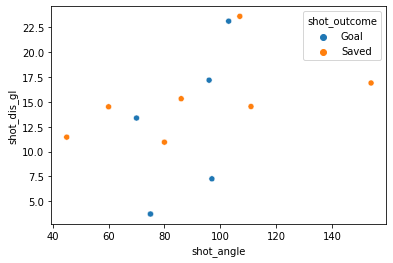

In [284]:
# shot_model.dtypes
sns.scatterplot(data=shot_model, x='shot_angle', y='shot_dis_gl', hue='shot_outcome')

In [285]:
for i in range(len(shot_model)):
    x_val = [int(shot_model['gk_pos_x'][i]), int(shot_model['shot_pos_x'][i])]
    x_dis_gl = 40 - int(shot_model['shot_pos_x'][i])
    y_val = [int(shot_model['gk_pos_y'][i]), int(shot_model['shot_pos_y'][i])]
    y_dis_gl = 120 -  int(shot_model['shot_pos_y'][i])
    hypot = np.hypot(x_dis_gl, y_dis_gl)
    # cos = x_dis_gl / hypot
    cos = x_dis_gl / hypot
    rad = np.arccos(cos)
    deg = np.rad2deg(rad/2)
    print('Hypotenuse: ' + str(hypot) + ' Ankathete: ' + str(x_dis_gl) + ' Gegenkathete: ' + str(y_dis_gl))
    print('Kosinus: ' + str(cos) + ' Arcos: ' + str(rad) + ' Winkel: ' + str(deg))


Hypotenuse: 14.866068747318506 Ankathete: 5 Gegenkathete: 14
Kosinus: 0.3363363969981562 Arcos: 1.2277723863741932 Winkel: 35.17308797097335
Hypotenuse: 16.1245154965971 Ankathete: 8 Gegenkathete: 14
Kosinus: 0.49613893835683387 Arcos: 1.0516502125483735 Winkel: 30.127559351528884
Hypotenuse: 26.248809496813376 Ankathete: -8 Gegenkathete: 25
Kosinus: -0.3047757271037837 Arcos: 1.8804992713373527 Winkel: 53.87233581252846
Hypotenuse: 8.06225774829855 Ankathete: -1 Gegenkathete: 8
Kosinus: -0.12403473458920847 Arcos: 1.695151321341658 Winkel: 48.5625081744509
Hypotenuse: 19.1049731745428 Ankathete: -2 Gegenkathete: 19
Kosinus: -0.10468478451804275 Arcos: 1.6756732655251305 Winkel: 48.00450297874726
Hypotenuse: 17.029386365926403 Ankathete: 1 Gegenkathete: 17
Kosinus: 0.058722021951470346 Arcos: 1.5120405040791738 Winkel: 43.3167696682851
Hypotenuse: 12.727922061357855 Ankathete: 9 Gegenkathete: 9
Kosinus: 0.7071067811865476 Arcos: 0.7853981633974483 Winkel: 22.5
Hypotenuse: 16.1554944214

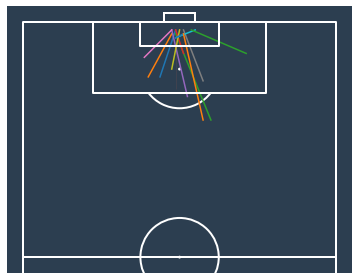

In [286]:
from mplsoccer import Pitch, VerticalPitch
# from matplotlib.colors import LinearSegmentedColormap

# flamingo_map = LinearSegmentedColormap.from_list("Flaming - 10 colors",
#                                                        ['#e3aca7', '#c03a1d'], N=10)

#pitch = Pitch(pitch_color='#2C3E50', line_color='#FFFFFF', pitch_type='statsbomb')
pitch = VerticalPitch(pitch_color='#2C3E50', line_color='#FFFFFF', pitch_type='statsbomb', line_zorder=2, half=True, goal_type='box')
#pitch = VerticalPitch(pitch_color='#2C3E50', line_color='#FFFFFF', pitch_type='statsbomb', line_zorder=2)
fig, ax =pitch.draw()
# sns.scatterplot(data=shot_model, x=shot_model['gk_pos_x'], y=shot_model['gk_pos_y'], hue='shot_outcome')
# sns.scatterplot(data=shot_model, x=shot_model['shot_pos_x'], y=shot_model['shot_pos_y'], hue='shot_outcome')

#sns.lineplot(data=shot_model, x=[shot_model['gk_pos_x'], shot_model['gk_pos_y']], y=[shot_model['shot_pos_x'], shot_model['shot_pos_y']])
for i in range(len(shot_model)):
    x_val = [int(shot_model['gk_pos_x'][i]), int(shot_model['shot_pos_x'][i])]
    x_dis = int(shot_model['gk_pos_x'][i]) - int(shot_model['shot_pos_x'][i])
    y_val = [int(shot_model['gk_pos_y'][i]), int(shot_model['shot_pos_y'][i])]
    y_dis = int(shot_model['gk_pos_y'][i]) -  int(shot_model['shot_pos_y'][i])
    sns.lineplot(x=x_val,
            y=y_val)
    # sns.lineplot(x=[40, int(shot_model['shot_pos_x'][i])],
    #          y=[120, int(shot_model['shot_pos_y'][i])])
    # print(x_val, y_val)
    # print(x_dis, y_dis)
    # print(np.hypot(x_dis, y_dis))

plt.show()

In [565]:
class GetStatsbombData:
    def __init__(self):
        self.competition_file = '/Users/matthiashugli/Virtualenvs/youth-base/youth-base/goalkeeping/open-data/data/competitions.json'

    def get_competition(self, league_name):
        # league_name = input("Choose League: Champions League, \
        #                         FA Women's Super League, FIFA World Cup, \
        #                             La Liga, NWSL, Premier League, UEFA Euro, Women's World Cup")
        comp_file = pd.read_json(self.competition_file)
        competitions = pd.DataFrame(comp_file)
        self.competition_ids = str(competitions[competitions['competition_name'] == (league_name)]['competition_id'].unique()[0])
        
    def get_match_id(self):
        match_files = '/Users/matthiashugli/Virtualenvs/youth-base/youth-base/goalkeeping/open-data/data/matches/' \
            + self.competition_ids + '/*.json'
        matches = pd.DataFrame()
        for filename in glob.glob(match_files):
            file = pd.read_json(filename)
            df = pd.DataFrame(file)
            matches = pd.concat([matches, df])
            self.match_ids = pd.Series(matches['match_id']).tolist()    

    def get_event_files(self, league_name):
        self.get_competition(league_name=league_name)
        self.get_match_id()
        event_path = '/Users/matthiashugli/Virtualenvs/youth-base/youth-base/goalkeeping/open-data/data/events/'
        events = pd.DataFrame()
        for i in self.match_ids:
            filename = event_path + str([i][0]) + '.json'
            file = pd.read_json(str(filename))
            df = pd.DataFrame(file)
            df['event_name'] = [v['name'] for k, v in df['type'].items()]
            df['event_detail'] = [v['name'] for k, v in df['play_pattern'].items()]
            df.drop(['type', 'play_pattern'], axis=1, inplace=True)
            events = pd.concat([events, df])
        
        return events

            # + matches + '.json'
        
        # df = pd.DataFrame()
        # for filename in glob.glob(event_files):
        #     file = pd.read_json(filename)
        #     file.insert(1, 'filename', filename)
        #     df = df.append(file)
        #     df['event_name'] = [v['name'] for k, v in df['type'].items()]
        #     df['event_detail'] = [v['name'] for k, v in df['play_pattern'].items()]
        #     df.drop(['type', 'play_pattern'], axis=1, inplace=True)
        #     return df

In [566]:
x = GetStatsbombData()
# competitions = x.get_competition('La Liga')
# x.get_match_id()
events = x.get_event_files('UEFA Euro')
# matches = df['match_id'].tolist()

In [568]:
len(events[events['event_name'] == 'Shot'])

1289

In [ ]:
#pd.concat([merge_gk, gk_exp.drop(['type'], axis=1), gk_exp['type'].apply(pd.Series)], axis=1).rename(columns={'name': 'type'}).drop(['id'], axis=1)
# gk_exp.head()




    #merge_df = pd.concat([merge_df, exp_col[column]], axis=1)
    #print(exp_col.columns)

#pd.concat((merge_gk, gk_exp), axis=1)
# name_exp = pd.concat([gk_exp.drop(['type'], axis=1), gk_exp['type'].apply(pd.Series)], axis=1)
# pos_exp = pd.concat([name_exp.drop(['position'], axis=1), name_exp['position'].apply(pd.Series)], axis=1)

#for column in gk_exp:
    #gk_exp[column] = gk_exp.apply(pd.concat([gk_exp.drop([column], axis=1), gk_exp[column].apply(pd.Series)], axis=1))


In [ ]:
merge_gk[merge_gk['one_on_one'].notna()]

In [ ]:
df['event_name'] = [v['name'] for k, v in df['type'].items()]
df['event_detail'] = [v['name'] for k, v in df['play_pattern'].items()]
statsbomb_gk = df[df['event_name'] == 'Goal Keeper']
statsbomb_gk = statsbomb_gk[['id', 'timestamp', 'related_events','player','location', 'goalkeeper', 'event_name', 'event_detail']]
statsbomb_gk['type'] = [v['type']['name'] for k, v in statsbomb_gk['goalkeeper'].items()]
statsbomb_gk = statsbomb_gk[statsbomb_gk['type'] != 'Shot Faced'].reset_index()
goalkeeper_exp = pd.json_normalize(statsbomb_gk['goalkeeper'])
goalkeeper_exp = goalkeeper_exp[goalkeeper_exp['outcome.name'].notna()].reset_index()
statsbomb_gk = statsbomb_gk.merge(goalkeeper_exp, left_index=True, right_index=True)

In [ ]:
df['event_name'] = [v['name'] for k, v in df['type'].items()]
df['event_detail'] = [v['name'] for k, v in df['play_pattern'].items()]
statsbomb_gk = df[df['event_name'] == 'Goal Keeper']
statsbomb_gk = statsbomb_gk[['id', 'timestamp', 'related_events','player','location', 'goalkeeper', 'event_name', 'event_detail']]
statsbomb_gk['type'] = [v['type']['name'] for k, v in statsbomb_gk['goalkeeper'].items()]
statsbomb_gk = statsbomb_gk[statsbomb_gk['type'] != 'Shot Faced'].reset_index()
goalkeeper_exp = pd.json_normalize(statsbomb_gk['goalkeeper'])
goalkeeper_exp = goalkeeper_exp[goalkeeper_exp['outcome.name'].notna()].reset_index()
statsbomb_gk = statsbomb_gk.merge(goalkeeper_exp, left_index=True, right_index=True)
statsbomb_gk['related_events'] = [i[0] for i in statsbomb_gk['related_events']]
statsbomb_gk = statsbomb_gk.merge(df, left_on='related_events', right_on='id')
statsbomb_gk['type_y'] = [v['name'] for k, v in statsbomb_gk['type_y'].items()]
#statsbomb_gk.drop(columns=['index_x', 'goalkeeper_x', 'index_y', 'type.id', 'outcome.id', 'technique.id', 'position.id', 'body_part.id', 'type.name'], inplace=True)

In [ ]:
shots = statsbomb_gk[['type_x', 'type_y', 'goalkeeper_x', 'shot', 'location_x', 'location_y', 'minute', 'player_x']]
shots = shots[shots['type_y'] == 'Shot']
shots['x_goalkeeper'] = [i[0] for i in shots['location_x']]
shots['y_goalkeeper'] = [i[1] for i in shots['location_x']]
shots['x_location'] = [i[0] for i in shots['location_y']]
shots['y_location'] = [i[1] for i in shots['location_y']]
#goalkeeper_exp = pd.json_normalize(shots['goalkeeper_x'])
#goalkeeper_exp = goalkeeper_exp[goalkeeper_exp['outcome.name'].notna()].reset_index()
#shots = shots.merge(goalkeeper_exp, left_index=True, right_index=True)
#shot_exp = pd.json_normalize(shots['shot'])
#shot_exp = shot_exp[shot_exp['outcome.name'].notna()].reset_index()
#shots = shots.merge(shot_exp, left_index=True, right_index=True)
#shots = shots[shots['open_goal'].isna()].reset_index()
shots['xG'] = [v['statsbomb_xg'] for k, v in shots['shot'].items()]
shots['goalkeeper'] = [v['name'] for k, v in shots['player_x'].items()]

shots = shots[['minute', 'goalkeeper', 'type_x', 'xG', 'x_goalkeeper', 'y_goalkeeper', 'x_location', 'y_location']]
shots['x_gk'] = shots['y_goalkeeper'] - 40
shots['y_gk'] = shots['x_goalkeeper']
shots['x_shot'] = 80 - shots['y_location'] -40
shots['y_shot'] = 120 - shots['x_location']
shots = shots.reset_index()
shots = shots[['minute','goalkeeper', 'type_x', 'xG', 'x_gk', 'y_gk', 'x_shot', 'y_shot']]

# Math Calculations
shots['shot_distance'] = np.sqrt( np.square(shots['x_shot']) + np.square(shots['y_shot']))
shots['gk_distance'] = np.sqrt(np.square(shots['x_shot'] - shots['x_gk']) + np.square(shots['y_shot'] - shots['y_gk']))
shots['shot_location'] = shots['x_shot'].apply(lambda x: 'frontal' if x < 4 and x > -4 else 'angle')

In [ ]:
goals = shots[shots['type_x'] == 'Goal Conceded']
saves = shots[shots['type_x'] == 'Shot Saved']
short_dist = shots[shots['shot_distance'].between(9, 18)]

In [ ]:
#shots.head()
len(shots)

In [ ]:
box_map()
for i in range(len(shots)):
    if shots['type_x'][i] == 'Shot Saved':
        hue_color = 'grey'
    else:
        hue_color = 'red'

    if shots['goalkeeper'][i] == 'Marc-André ter Stegen':
        gk_color = 'blue'
    else:
        gk_color = 'purple'
    
    plt.plot([int(shots['x_shot'][i]), int(shots['x_gk'][i])], [int(shots['y_shot'][i]), int(shots['y_gk'][i])], color=hue_color)

    plt.plot(int(shots['x_gk'][i]), int(shots['y_gk'][i]), 'o', color=gk_color)

In [ ]:
sns.histplot(data=saves, x='shot_distance')
plt.show()

sns.histplot(data=saves, x='gk_distance')
plt.show()

In [ ]:
sns.histplot(data=goals, x='shot_distance')
plt.show()

sns.histplot(data=goals, x='gk_distance')
plt.show()

In [ ]:
sns.scatterplot(data=short_dist, x='shot_distance', y='gk_distance', hue='shot_location')
plt.show()

# Instat Data

In [ ]:
# Field dimension on Instat 105 x 68 y
url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=36&start_ms=0&match_id=1969128&lang_id=1&lang=&format=json'


df = pd.DataFrame()
file = pd.read_json(url)
df = df.append(file['data']['row'])

match_url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=35&tournament_id=78&season_id=28&date_start=&date_end=&lang_id=1&lang=&format=json'

match_df = pd.DataFrame()
file = pd.read_json(match_url)
match_df = match_df.append(file['data']['row'])

In [ ]:
match_df[['id', 'match_date', 'team1_name', 'team2_name']]

In [ ]:
#df['action_name'].drop_duplicates().tail(50)
df[(df['action_name'].str.contains('Chance')) | (df['action_name'] == 'Assist')].drop_duplicates().iloc[:,0:20]

In [ ]:
df[df['action_name'] == 'Goal'].iloc[:,0:15].reset_index()
#sample = df[df['id'] == '20471'][['action_name', 'player_name', 'opponent_name', 'pos_x', 'pos_y', 'pos_dest_x', 'pos_dest_y', 'gate_x', 'gate_y']]

In [ ]:
df['second'] = df['second'].astype(float)
df[df['second'].between(1875, 1890)].iloc[:, 0:20]

In [ ]:
df[(df['position_name'] == 'Goalkeeper') & (df['action_name'] == 'Supersaves')].iloc[:,0:20].reset_index()
#df[df['action_name'] == 'Ball receiving'].iloc[:,0:15]
#df[df['position_name'] == 'Goalkeeper']['action_name'].drop_duplicates()

In [ ]:
df[df['position_name'] == 'Goalkeeper']
df.dropna(axis=1, how='all', inplace=True)

In [ ]:
gk_set = df[['player_name', 'action_name', 'pos_x', 'pos_y', 'zone_name', 'attack_type_name', 'gate_x', 'gate_y', 'shot_type']]

In [ ]:
gk_set[gk_set['player_name'] == 'Mory Diaw'].groupby('action_name').count()

In [ ]:
gk_set[gk_set['action_name'] == 'Supersaves']

In [ ]:
sample

In [ ]:
# 68 / 80 = 0.85
# 105 / 120 = 0.875
34 / 0.85

sample = sample[['pos_x', 'pos_y', 'pos_dest_x', 'pos_dest_y', 'gate_x', 'gate_y']].astype(float)
sample['x_shot'] = (80 - sample['pos_y'] / 0.85 - 40) * -1
sample['y_shot'] = 120 - sample['pos_x'] / 0.875
sample['final_x'] = 80 - sample['pos_dest_y'] / 0.85 -40
sample['final_y'] = 120 - sample['pos_dest_x'] / 0.875

In [ ]:
box_map()
sns.scatterplot(data=sample, x='final_x', y='final_y')


# Instat XML

In [ ]:
# Field dimension on Instat 105 x 68 y
url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=36&start_ms=0&match_id=1969128&lang_id=1&lang=&format=json'


df = pd.DataFrame()
file = pd.read_json(url)
df = df.append(file['data']['row'])

match_url = 'http://service.instatfootball.com/feed.php?id=835502&key=L1DQccmn&tpl=35&tournament_id=78&season_id=28&date_start=&date_end=&lang_id=1&lang=&format=json'

match_df = pd.DataFrame()
file = pd.read_json(match_url)
match_df = match_df.append(file['data']['row'])

In [ ]:
import xmltodict
import json
import xml.etree.ElementTree as etree

# Field dimension on Instat 105 x 68 y
source_data = '/Users/matthiashugli/Dropbox/bucket/sample-data/23-10-2021--Switzerland--Credit-Suisse-Super-LeagueYoung-Boys-3-2-Lausanne-Sport20220220-76331-1ahfybv.xml'
large_data = '/Users/matthiashugli/Dropbox/bucket/sample-data/23-10-2021--Switzerland--Credit-Suisse-Super-LeagueYoung-Boys-3-2-Lausanne-Sport20220119-89784-gbgtk8.xml'
filtered_export = '/Users/matthiashugli/Dropbox/bucket/super-league-stats/13-02-2022--Switzerland--Credit-Suisse-Super-LeagueZurich-3-0-Lugano20220224-15161-1pjrfk1.xml'
servette = '/Users/matthiashugli/Dropbox/bucket/super-league-stats/20-02-2022--Switzerland--Credit-Suisse-Super-LeagueServette-1-1-Luzern20220225-78204-1s38f86.xml'
#filtered_export = '/Users/matthiashugli/Dropbox/bucket/sample-data/13-02-2022--Switzerland--Credit-Suisse-Super-LeagueZurich-3-0-Lugano20220217-48763-1if7ja.xml'

filelocation = '/Users/matthiashugli/Dropbox/bucket/super-league-stats/*.xml'

all_events = []
for filename in glob.glob(filelocation):
    prstree = etree.parse(filename)
    root = prstree.getroot()

    event_items = []
    event_subitems = []
    header = ['start', 'end', 'player', 'x_pos', 'y_pos', 'team', 'action', 'half']

    for r in root.iter('ALL_INSTANCES'):
        for inst in r.iter('instance'):
        
            start = inst.find('start').text
            end = inst.find('end').text
            player = inst.find('code').text

            if inst.find('pos_x') != None:
                x_pos = inst.find('pos_x').text
                y_pos = inst.find('pos_y').text
            
            event_items = [start, end, player, x_pos, y_pos]
            
            for label in inst.iter('label'):
                labels = label.find('text').text
                event_items.append(labels)

            all_events.append(event_items)

df = pd.DataFrame(all_events, columns=header)

In [ ]:
data_types_dict = {'start': float, 'end': float, 'x_pos': float, 'y_pos': float}
df = df.astype(data_types_dict)

In [ ]:
#df[df['action'].isin(['Shot into the bar/post', 'Own goal'])]
df[615:635]
#df[df['start'] == 2940.65]

In [ ]:
# Action variables
shot_outcome_actions = ['Wide shot', 'Shot on target', 'Shot into the bar/post', 'Goals']
goal_situations = ['Assists', 'Goals', 'Free-kick attacks', 'penalty attack']
gk_actions = ['Wide shot (Goalkeepers)', 'Shot on target (saved)', 'Goals conceded']

In [ ]:
shots = df[df['action'] == 'Shots'].reset_index()

action_before_shots = df.reset_index()
action_before_shots.rename(columns={'index': 'id'}, inplace=True)

for i in range(1, 5):
    action_before_shots['action-' + str(i)] = action_before_shots.id.shift(i)
    action_before_shots['action+' + str(i)] = action_before_shots.id.shift(-i)

melt_actions = pd.melt(action_before_shots, id_vars=action_before_shots.iloc[:,:8], value_vars=action_before_shots.iloc[:,9:])
melt_actions = melt_actions[melt_actions['action'] == 'Shots']
melt_actions.dropna(subset=['value'], inplace=True)
melt_actions.merge(action_before_shots, left_on='value', right_on='id')
melt_actions['value'] = melt_actions['value'].astype('int64')
merge_actions = melt_actions.merge(action_before_shots, left_on='value', right_on='id').reset_index()

merge_actions['time_diff'] = (merge_actions['start_y'] - merge_actions['start_x'])
merge_actions['field_progression'] = merge_actions['x_pos_x'] - merge_actions['x_pos_y']

last_action = merge_actions[(merge_actions['time_diff'] <= 0) & \
                         (~merge_actions['action_y'].isin(shot_outcome_actions)) & \
                         (merge_actions['team_x'] == merge_actions['team_y'])] \
        .sort_values(by=['id_x', 'time_diff']).drop_duplicates(subset=['id_x'], keep='last')

gk_action = merge_actions[merge_actions['action_y'].isin(['Wide shot (Goalkeepers)', 'Shot on target (saved)'])].sort_values(by=['id_x'])

shot_creation = shots.merge(last_action[['id_x', 'x_pos_y', 'y_pos_y', 'action_y', 'time_diff']], how='left', left_on='index', right_on='id_x')
shot_creation = shot_creation.merge(gk_action[['id_x', 'team_y', 'action_y', 'player_y']], how='left', left_on='index', right_on='id_x').drop(columns=['index', 'half', 'id_x_x', 'id_x_y']) \
    .rename(columns={'team': 'attacking_team', 'x_pos_y': 'x_pos_ass', 'y_pos_y': 'y_pos_ass', 'team_y': 'defending_team', 'player_y': 'goalkeeper', 'action_y_x': 'action', 'action_y_y': 'outcome_gk', 'action': 'outcome'})

In [ ]:
goals = df[df['action'] == 'Goals'].reset_index()

action_before_goals = df.reset_index()
action_before_goals.rename(columns={'index': 'id'}, inplace=True)

for i in range(1, 5):
    action_before_goals['action-' + str(i)] = action_before_goals.id.shift(i)
    action_before_goals['action+' + str(i)] = action_before_goals.id.shift(-i)

melt_goals = pd.melt(action_before_goals, id_vars=action_before_goals.iloc[:,:8], value_vars=action_before_goals.iloc[:,9:])
melt_goals = melt_goals[melt_goals['action'] == 'Goals']
melt_goals.dropna(subset=['value'], inplace=True)
melt_goals.merge(action_before_goals, left_on='value', right_on='id')
melt_goals['value'] = melt_goals['value'].astype('int64')
merge_goals = melt_goals.merge(action_before_goals, left_on='value', right_on='id').reset_index()

merge_goals['time_diff'] = np.where(merge_goals['start_y'] - merge_goals['start_x'] > 0, \
                                    (merge_goals['start_y'] - merge_goals['start_x']) * -1, \
                                    merge_goals['start_y'] - merge_goals['start_x'])
merge_goals['field_progression'] = merge_goals['x_pos_x'] - merge_goals['x_pos_y']

last_action = merge_goals[(merge_goals['action_y'].isin(goal_situations)) & \
                         (merge_goals['team_x'] == merge_goals['team_y'])] \
        .sort_values(by=['id_x', 'time_diff'], ascending=True).drop_duplicates(subset=['id_x'], keep='last')

gk_action = merge_goals[merge_goals['action_y'] == 'Goals conceded'].sort_values(by=['id_x'])

goal_creation = goals.merge(last_action[['id_x', 'x_pos_y', 'y_pos_y', 'action_y', 'time_diff']], how='left', left_on='index', right_on='id_x')
goal_creation = goal_creation.merge(gk_action[['id_x', 'team_y', 'action_y', 'player_y']], how='left', left_on='index', right_on='id_x').drop(columns=['index', 'half', 'id_x_x', 'id_x_y']) \
    .rename(columns={'team': 'attacking_team', 'x_pos_y': 'x_pos_ass', 'y_pos_y': 'y_pos_ass', 'team_y': 'defending_team', 'player_y': 'goalkeeper', 'action_y_x': 'action', 'action_y_y': 'outcome_gk', 'action': 'outcome'})

In [ ]:
shot_creation.head()

In [ ]:
goal_creation.head()

In [ ]:
chance_creation = pd.concat([shot_creation, goal_creation]).reset_index()
passing = chance_creation[chance_creation['action'].isin(['Passes accurate', 'Passes (inaccurate)', 'Assists'])]
passing_deviation = passing['time_diff'].mean() + (passing['time_diff'].std() * -3)
passing = passing[passing['time_diff'] >= passing_deviation]
passing.to_csv('/Users/matthiashugli/Dropbox/bucket/super-league-stats/chance_creation_passes.csv')

In [ ]:
passing.head()

In [ ]:
shot_outcome = df[df['action'].isin(shot_outcome_actions)].reset_index()
shot_outcome.rename(columns={'index': 'id'}, inplace=True)
# print(len(shot_creation))
# # print(shot_creation['id_x'].nunique())
# print(len(goal_creation))
# print(goal_creation['id_x'].nunique())
#goal_creation.tail(20)
#df[df['action'].isin(shot_outcome_actions)].count()

merge_outcome = chance_creation.merge(shot_outcome, how='left', left_on='id_x', right_on='id', suffixes=(False, '_outcome'))
merge_outcome[merge_outcome['start_outcome'].isna()][['id_x']].head()

In [ ]:
from mplsoccer import VerticalPitch
from matplotlib.colors import LinearSegmentedColormap

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

team = passing['attacking_team'].unique()
passing['x_pos_assist'] = passing['y_pos_ass']
passing['y_pos_assist'] = passing['x_pos_ass']

pitch = VerticalPitch(pitch_color='#2C3E50', line_color='#FFFFFF', pitch_type='uefa', line_zorder=2)
fig, axes = pitch.grid(nrows=2, ncols=5, space=0.1, figheight=20,
                      title_height=0, endnote_height=0,  # no title/ endnote
                      grid_width=0.9, grid_height=0.98, bottom=0.01, left=0.05)
for i, ax in enumerate(axes['pitch'].flat):
    ax.set(xlim=(0,68), ylim=(0,105))
    sns.kdeplot(data=passing[passing['attacking_team'] == team[i]], x='x_pos_assist', y='y_pos_assist', fill=True, ax=ax, shade=True, levels=20, cmap='mako')
    #hexbin = pitch.hexbin(passing['x_pos_assist'], passing['y_pos_assist'], edgecolors='#122c3d', ax=ax, gridsize=(8, 8), cmap=pearl_earring_cmap)
    ax.set_title(team[i], fontsize=32)
fig.text(0.5, 1.1, 'Swiss Super League 2022 Chance Creation', ha='center', fontsize=48, fontweight='bold')
fig.text(0.5, 1.06, 'Location of the last Passes before Shot attempt or Goal (Dribblings and Interceptions excluded)', ha='center', fontsize=36)
fig.text(0.12, 0.001, 'Source Instat', ha='left', fontsize=20)
fig.text(0.9, 0.001, 'Visualization @huegli_matthias', ha='right', fontsize=20)

plt.show()